# Titanic Survivor Analysis
##  What factors made people more likely to survive?
### *RMS Titanic was a passenger liner that sank in the North Atlantic Ocean on 15 April 1912 after colliding with an iceberg during her first voyage from Southampton, UK to New York City, US. The sinking of Titanic caused the deaths of 1,514 people in one of the deadliest peacetime maritime disasters in history. Titanic was the largest ship at the time and was called 'the unsinkable'.*

#### This is a digital recreation of the sinking:

[![IMAGE ALT TEXT](http://img.youtube.com/vi/9xoqXVjBEF8/0.jpg)](http://www.youtube.com/watch?v=9xoqXVjBEF8 "Titanic sinking")

## Data Wrangling Phase

In [267]:
# Imports
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [268]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("./titanic_data.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
#summary of dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Available factors in the dataset:

| Column Name   | Description                       | Completeness  | 
| :-----------: |:---------------------------------:| :------------:| 
| PassengerId   | ID of Passenger                   | 891/891       | 
| Survived      | Survival (1)                      | 891/891       | 
| Pclass        | Passenger Class (2)               | 891/891       |
| Name          | Name                              | 891/891       | 
| Sex           | Sex                               | 891/891       |
| Age           | Age                               | 714/891       |
| SibSp         | Number of Siblings/Spouses Aboard | 891/891       |
| Parch         | Number of Parents/Children Aboard | 891/891       |
| Ticket        | Ticket Number                     | 891/891       |
| Fare          | Passenger Fare                    | 891/891       |
| Cabin         | Cabin                             | 204/891       |
| Embarked      | Port of Embarkation (3)           | 889/891       |

1: (0 = No; 1 = Yes)
2: (1 = 1st; 2 = 2nd; 3 = 3rd)
3: (C = Cherbourg; Q = Queenstown; S = Southampton)

## Missing Data
As seen above, most columns contain complete data. Only Age (177 missing values), Cabin (687 missing values) and Port of Embarkation (2 missing values) are incomplete.

### Cabin
Most of the cabin data is missing, so it will not be considered in this analysis. The Passenger Class also includes the cabin/deck of the passenger, as the first class had the upper decks, second class the mid, and third class the lower decks ([wiki](https://en.wikipedia.org/wiki/RMS_Titanic#Dimensions) - Dimensions and layout).


In [270]:
# drop cabin column
titanic_df = titanic_df.drop('Cabin', 1)

### Age
The age is a key demographic factor and missing data should be imputed. Roughly 20% of the data is missing, the goal is to fill the missing values without changing the distribution.

In [271]:
# Describe available ages
age = titanic_df[["Age"]].dropna()
describtion_age = age.describe()
describtion_age

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [272]:
# Interpolate missing ages
titanic_df['Age_mod'] = titanic_df[["Age"]].interpolate()
age_mod = titanic_df[["Age_mod"]]

# Describe both original and interpolated data
describtion_age_mod = age_mod.describe()
pd.concat([describtion_age, describtion_age_mod], axis=1)

,Age,Age_mod
count,714.000000,891.000000
mean,29.699118,29.726061
std,14.526497,13.902353
min,0.420000,0.420000
25%,20.125000,21.000000
50%,28.000000,28.500000
75%,38.000000,38.000000
max,80.000000,80.000000


/Users/lt/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


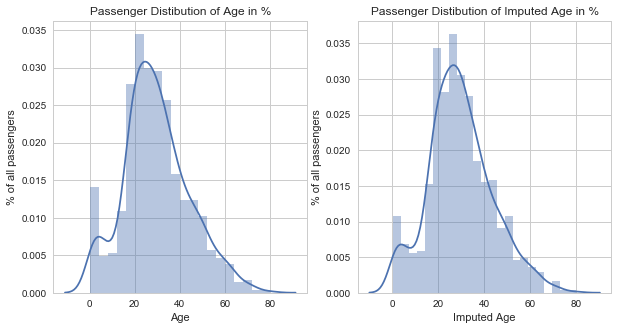

In [273]:
fig, (axis0,axis1) = plt.subplots(1,2,figsize=(10,5))

# Create distplot for orginal ages
age_distplot = sns.distplot(age, ax=axis0)
# Naming the plot
axes = age_distplot.axes
axes.set_title('Passenger Distibution of Age in %')
axes.set_ylim(0,)
axes.set(xlabel='Age', ylabel='% of all passengers')

# Create distplot for interpolated ages
age_mod_distplot = sns.distplot(age_mod, ax=axis1)
# Naming the plot
axes_mod = age_mod_distplot.axes
axes_mod.set_title('Passenger Distibution of Imputed Age in %')
axes_mod.set_ylim(0,)
axes_mod.set(xlabel='Imputed Age', ylabel='% of all passengers')

plt.show()

Interpolation imputed the missing values without changing the underlying distribution too much as seen in marginal change of the location parameters as well as the distribution plots above.

In [274]:
# Finally we get rid of age_mod and change the age column for the interpolated values 
titanic_df['Age'] = titanic_df["Age_mod"]
titanic_df = titanic_df.drop('Age_mod', 1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


# Embarked

In [275]:
# Only two values are missing
# NaNs will be replaced with most occuring value
titanic_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [276]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(value='S')
titanic_df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [277]:
# Check dataframe for missing values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### Data wrangling completed
All missing values are handled.

# Exploration Phase
The intersting columns in the dataframe are:
### Pclass
Did the Passenger Class influence the survival rate?
Wealthy people might have had a better chance of survival as their cabins were located in the top decks (and had the shortest distance to the lifeboats).
### Sex 
Were women or men more likely to survive?
### Age
Were young and old people evacuated first? Or did old people rather have a worse survival rate due to mobility issues? 
### SibSp & Parch
Did people with family onboard have a higher chance to survive as they helped each other?
### Fare
Won't be analysed as it is logically the same as pclass.
### Embarked
Won't be analysed as it logically should not impact the survival rate.

#### In the follwing I will go through each of those variables and discuss the findings.

## Pclass - Did the Passenger Class influence the survival rate?

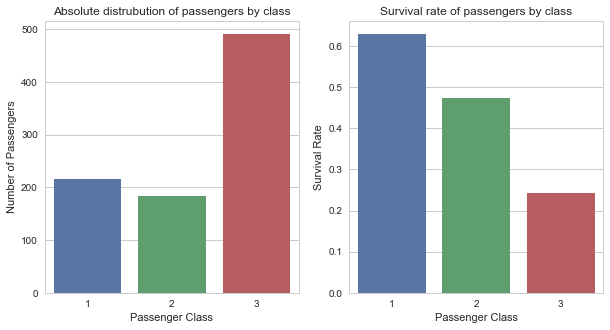

In [278]:
# How many passengers per class?
fig, (axis0,axis1) = plt.subplots(1,2,figsize=(10,5))
pclass_countplot = sns.countplot(x='Pclass', data=titanic_df, ax = axis0)
pclass_countplot.set(title = 'Absolute distrubution of passengers by class', xlabel='Passenger Class', ylabel='Number of Passengers')

### Survival rate per class?
class_srate = titanic_df[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean()
pclass_srate_countplot = sns.barplot(x='Pclass', y='Survived', data=class_srate, ax = axis1)
pclass_srate_countplot.set(title = 'Survival rate of passengers by class', xlabel='Passenger Class', ylabel='Survival Rate')

plt.show()

### The Survival Rate for passengers in the first and second class are way higher than for those in the third class.

Considering the first and second class being [located in the upper decks](http://www.dummies.com/education/history/titanic-facts-the-layout-of-the-ship/), it is likely that the location of a passenger mattered a lot when the titanic got evacuated. As the Titanic sunk during the night, it is likely that most passengers were in their cabins.

![Titanic Deck Overview](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Titanic_side_plan_annotated_English.png/1100px-Titanic_side_plan_annotated_English.png "Titanic Deck Overview")

## Sex - Were women or men more likely to survive?

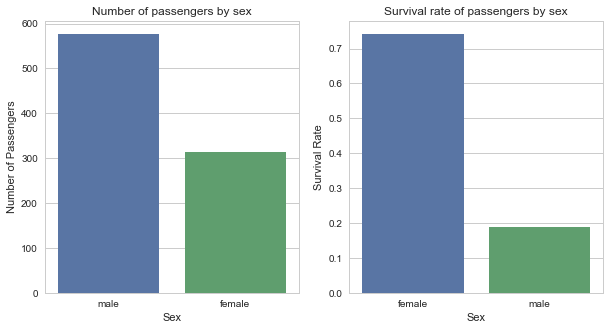

In [279]:
# How many women and men were on board?
fig, (axis0,axis1) = plt.subplots(1,2,figsize=(10,5))
sex_countplot = sns.countplot(x='Sex', data=titanic_df, ax = axis0)
sex_countplot.set(title = 'Number of passengers by sex',xlabel='Sex', ylabel='Number of Passengers')

# Survival rate by sex?
class_srate = titanic_df[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean()
pclass_srate_countplot = sns.barplot(x='Sex', y='Survived', data=class_srate, ax = axis1)
pclass_srate_countplot.set(title = 'Survival rate of passengers by sex',xlabel='Sex', ylabel='Survival Rate')

plt.show()

### Women had a way higher survival rate
Women had a survival rate of more than 70%, while less than 20% of all men on board survived.


### Did the survival rate also differ for women and men in the different classes?

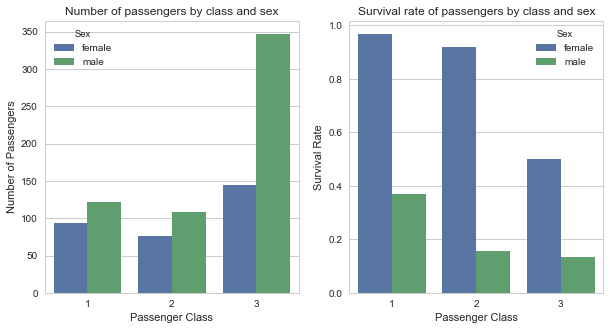

In [280]:
# How many passengers per class?
fig, (axis0,axis1) = plt.subplots(1,2,figsize=(10,5))
pclass_countplot = sns.countplot(x='Pclass', hue='Sex' , hue_order=['female', 'male'], data=titanic_df, ax = axis0)
pclass_countplot.set(title = 'Number of passengers by class and sex',xlabel='Passenger Class', ylabel='Number of Passengers')

### Survival rate per class?
class_srate = titanic_df[['Pclass','Sex', 'Survived']].groupby(['Pclass', 'Sex'],as_index=False).mean()
pclass_srate_barplot = sns.barplot(x='Pclass', y='Survived',hue='Sex', hue_order=['female', 'male'], data=class_srate, ax = axis1)
pclass_srate_barplot.set(title = 'Survival rate of passengers by class and sex', xlabel='Passenger Class', ylabel='Survival Rate')

plt.show()

### The high survival rate for women holds true for the 3rd class. The plots suggest that women travelling in the first or second class were highly unlikely to die.

## Age 
### Were young and old people evacuated first? Or did old people rather have a worse survival rate due to mobility issues?

In [281]:
def categorize_by_age(age):
    ''' takes an age and returns category based on age'''
    if age < 12:
        return 'child'
    if age < 21:
        return 'teenager'
    if age < 30:
        return 'twenties'
    if age < 40:
        return 'thirties'
    if age < 50:
        return 'fourties'
    if age < 60:
        return 'fifties'
    else:
        return 'senior'

In [282]:
# Categorize the age in the dataframe
titanic_df['Age_cat'] = titanic_df[['Age']].applymap(categorize_by_age)

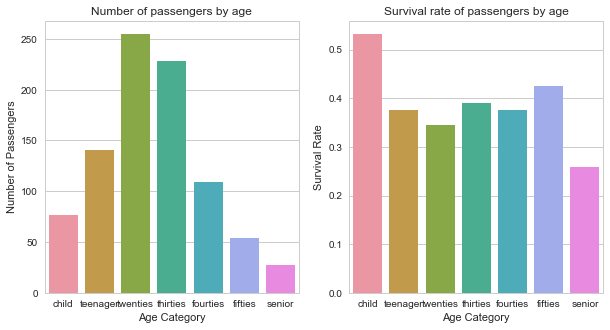

In [283]:
# How many passengers per age cat?
fig, (axis0,axis1) = plt.subplots(1,2,figsize=(10,5))
order_list =['child','teenager','twenties', 'thirties', 'fourties', 'fifties', 'senior']
age_cat_countplot = sns.countplot(x='Age_cat', data=titanic_df, ax = axis0, order=order_list)
age_cat_countplot.set(title = 'Number of passengers by age', xlabel='Age Category', ylabel='Number of Passengers')

# Survival rate by sex?
class_srate = titanic_df[['Age_cat', 'Survived']].groupby(['Age_cat'],as_index=False).mean()
age_cat_srate_countplot = sns.barplot(x='Age_cat', y='Survived', data=class_srate, ax = axis1, order=order_list)
age_cat_srate_countplot.set(title = 'Survival rate of passengers by age', xlabel='Age Category', ylabel='Survival Rate')

plt.show()

Children had a higher rate of survival, which was above 50%. Still this is way less than women in the first&second class. Seniors seemed to have a lower survival rate which might be due to physical fitness.

### Let's check if this might be influenced by the passengers sex

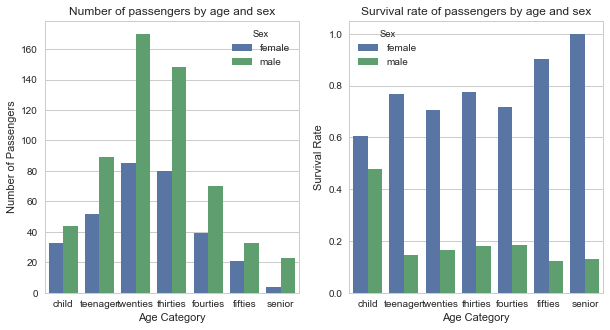

In [284]:
# How many passengers per class?
fig, (axis0,axis1) = plt.subplots(1,2,figsize=(10,5))
pclass_countplot = sns.countplot(x='Age_cat', hue='Sex' , hue_order=['female', 'male'], data=titanic_df, ax = axis0, order=order_list)
pclass_countplot.set(title = 'Number of passengers by age and sex', xlabel='Age Category', ylabel='Number of Passengers')

### Survival rate per class?
class_srate = titanic_df[['Age_cat','Sex', 'Survived']].groupby(['Age_cat', 'Sex'],as_index=False).mean()
pclass_srate_barplot = sns.barplot(x='Age_cat', y='Survived',hue='Sex', hue_order=['female', 'male'], data=class_srate, ax = axis1, order=order_list)
pclass_srate_barplot.set(title = 'Survival rate of passengers by age and sex', xlabel='Age Category', ylabel='Survival Rate')

plt.show()

#### The same pattern as before seems to hold true, females had a higher rate of survival. Only for children this is not true, the gender did not have such a high impact on the survival rate.

### Let's check if it might be influenced by the passengers class

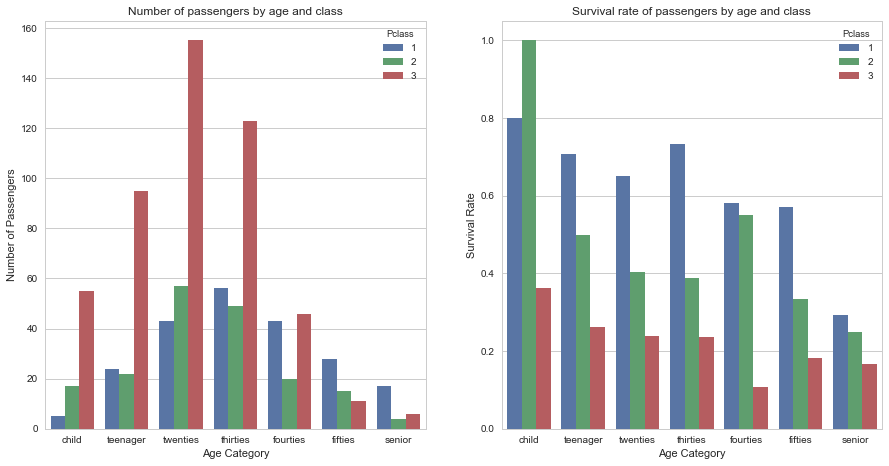

In [285]:
# How many passengers by age and class?
fig, (axis0,axis1) = plt.subplots(1,2,figsize=(15,7.5))
pclass_countplot = sns.countplot(x='Age_cat', hue='Pclass' , hue_order=[1, 2, 3], data=titanic_df, ax = axis0, order=order_list)
pclass_countplot.set(title = 'Number of passengers by age and class', xlabel='Age Category', ylabel='Number of Passengers')

### Survival rate by age and class?
class_srate = titanic_df[['Age_cat','Pclass', 'Survived']].groupby(['Age_cat', 'Pclass'],as_index=False).mean()
pclass_srate_barplot = sns.barplot(x='Age_cat', y='Survived',hue='Pclass', hue_order=[1, 2, 3], data=class_srate, ax = axis1, order=order_list)
pclass_srate_barplot.set(title = 'Survival rate of passengers by age and class', xlabel='Age Category', ylabel='Survival Rate')

plt.show()

### The age & class both influence the survival rate.
Younger passengers tend to have a higher survival rate, which is also true across the passengers classes.

## Family (SibSp & Parch)
### Did people with family onboard have a higher chance to survive as they helped each other?


In [286]:
# Family

# combine Parch&SibSp columns into family column
# if a passenger had a family member onboard it is 1 else 0
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 'yes'
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 'no'

/Users/lt/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


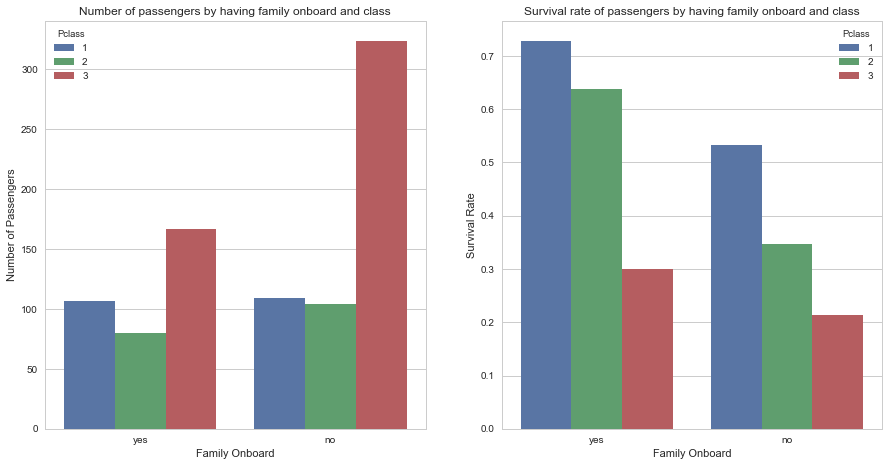

In [287]:
# How many passengers by family and class?
fig, (axis0,axis1) = plt.subplots(1,2,figsize=(15,7.5))
pclass_countplot = sns.countplot(x='Family', hue='Pclass' , hue_order=[1, 2, 3], data=titanic_df, ax = axis0, order=['yes', 'no'])
pclass_countplot.set(title = 'Number of passengers by having family onboard and class',xlabel='Family Onboard', ylabel='Number of Passengers')

### Survival rate per class?
class_srate = titanic_df[['Family','Pclass', 'Survived']].groupby(['Family', 'Pclass'],as_index=False).mean()
pclass_srate_barplot = sns.barplot(x='Family', y='Survived',hue='Pclass', hue_order=[1, 2, 3], data=class_srate, ax = axis1, order=['yes', 'no'])
pclass_srate_barplot.set(title = 'Survival rate of passengers by having family onboard and class', xlabel='Family Onboard', ylabel='Survival Rate')

plt.show()

### Having Family members onboard  increases rate of survival
The data also reveals that there were a lot of single men traveling in the 3rd class.

# Summary
* The Survival Rate for passengers in the first and second class are higher than for those in the third class.
* Women had a higher survival rate, no matter which class.
* Women travelling in the first or second class were highly unlikely to die.
* Children had a higher rate of survival, which was above 50%.
* Younger passengers were more likely to survive.
* Having Family members onboard  increases rate of survival.


# Conclusion
The data is indicating that the gender, age and having family onboard were factors that influenced the survival rate. The analysis so far is only descriptive, without any statistical measure of correlation. While this analysis provides a good overview about the dataset, it is not allowing general conclusions. This is due to:
* Incomplete dataset: only 891 of 2200 people onboard are included in the dataset. The selection from all passengers could be biased and influence the analysis.
* Definition of relatives is misleading, as pointed out in the data description "family relation variables (i.e. sibsp and parch) some relations were ignored" and "close friends or neighbors" were ignored too.

#### Further questions:
* How was the data collected? - this could also introduce a selection bias.
* Why is the selection of variables so limited?
* More questions could be answered, such as if the staff left the ship last.


All in all, it would be very intersting to apply a statistical method to see if the effects are just random (children are less than 100 of the pessengers, women less than 300), as the introduced Pearson correlation coefficient is [not sufficient for binary outcomes.](http://stats.stackexchange.com/questions/102778/correlations-between-continuous-and-categorical-nominal-variables)